In [91]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression

In [92]:


df = pd.read_csv(r"C:\Users\rashe\Downloads\automobile data.csv")

In [93]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,2015,1,buick
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth
3,16.0,8,304.0,150,3433,12.0,2015,1,amc
4,17.0,8,302.0,140,3449,10.5,2015,1,ford


In [94]:
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
393,27.0,4,140.0,86,2790,15.6,2003,1,ford
394,44.0,4,97.0,52,2130,24.6,2003,2,volkswagen
395,32.0,4,135.0,84,2295,11.6,2003,1,dodge
396,28.0,4,120.0,79,2625,18.6,2003,1,ford
397,31.0,4,119.0,82,2720,19.4,2003,1,chevrolet


In [95]:
df.shape

(398, 9)

In [96]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [97]:
df['Horsepower']=pd.to_numeric(df['Horsepower'],errors='coerce')

In [98]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [99]:
df.describe()   #discribtive statitics

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.489447,5.454774,193.425879,104.469388,2970.424623,15.568090,2008.989950,1.572864
std,7.849757,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,8.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,2003.000000,1.000000
25%,17.125000,4.000000,104.250000,75.000000,2223.750000,13.825000,2006.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,2009.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,2012.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,2015.000000,3.000000


In [100]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64

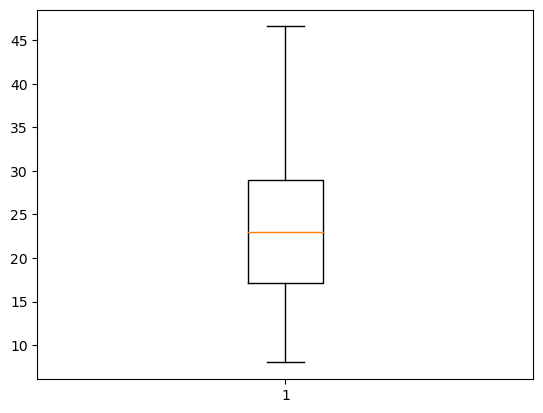

In [101]:
plt.boxplot(df['MPG'])
plt.show()

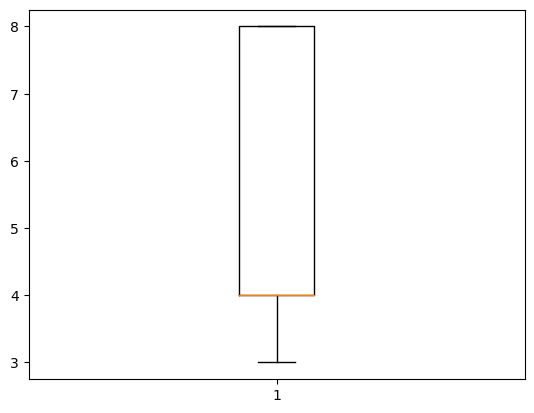

In [102]:
plt.boxplot(df['Cylinders'])

plt.show()

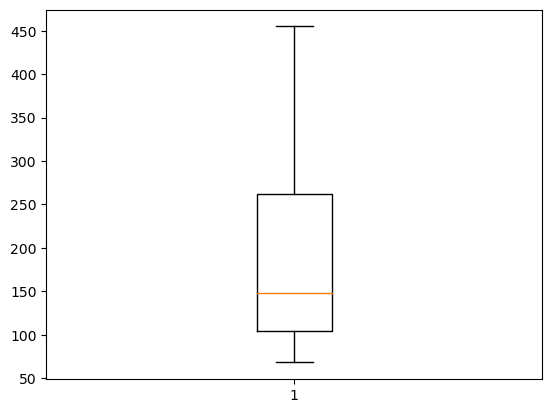

In [103]:
plt.boxplot(df['Displacement'])

plt.show()

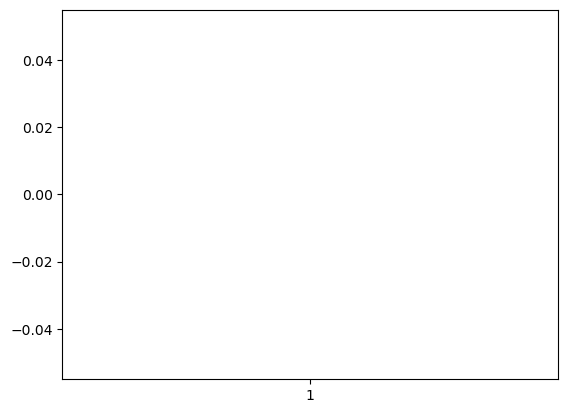

In [104]:
plt.boxplot(df['Horsepower'])

plt.show()

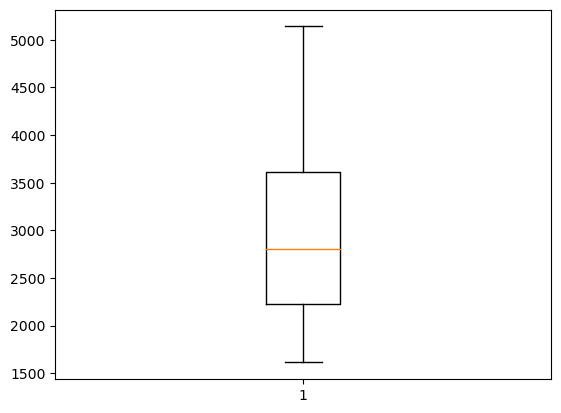

In [105]:
plt.boxplot(df['Weight'])

plt.show()

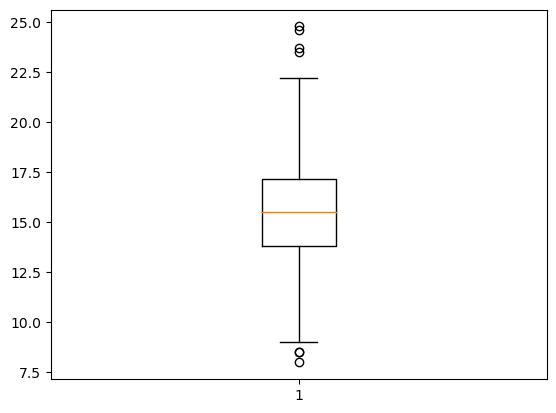

In [106]:
plt.boxplot(df['Acceleration'])

plt.show()

In [107]:
def remove_outliers(d,c):
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    iqr=q3-q1  #calculate inner quartile range
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    data_without_outlier=d[(d[c]<=ub) & (d[c]>=lb)]
    
    return data_without_outlier

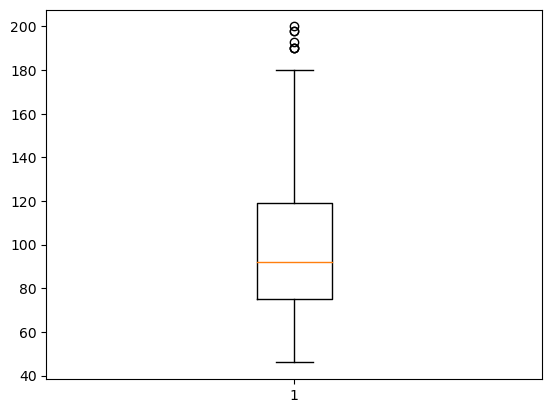

In [108]:
df=remove_outliers(df,'Horsepower')

plt.boxplot(df['Horsepower'])
plt.show()

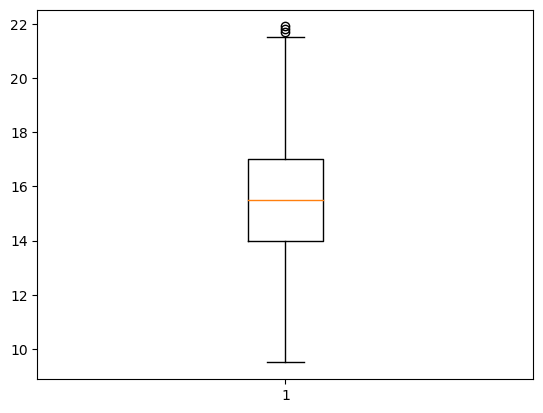

In [109]:
df=remove_outliers(df,'Acceleration')

plt.boxplot(df['Acceleration'])
plt.show()

# eda

In [110]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_year', 'Origin', 'Car_Name'],
      dtype='object')

In [111]:
df.shape

(373, 9)

C:\Users\rashe\AppData\Local\Temp\ipykernel_13872\338035577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MPG'])


<Axes: xlabel='MPG', ylabel='Density'>

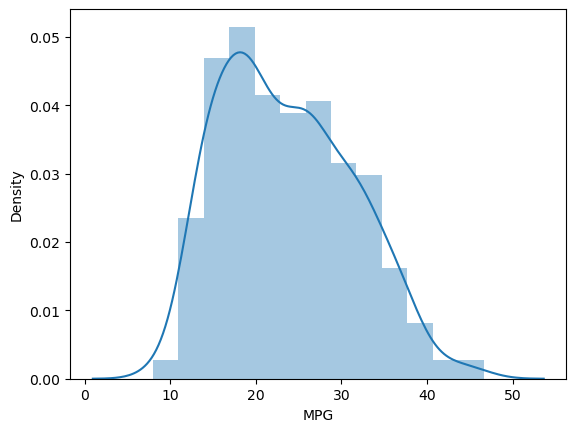

In [112]:
sns.distplot(df['MPG'])

C:\Users\rashe\AppData\Local\Temp\ipykernel_13872\2895956405.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Displacement'])


<Axes: xlabel='Displacement', ylabel='Density'>

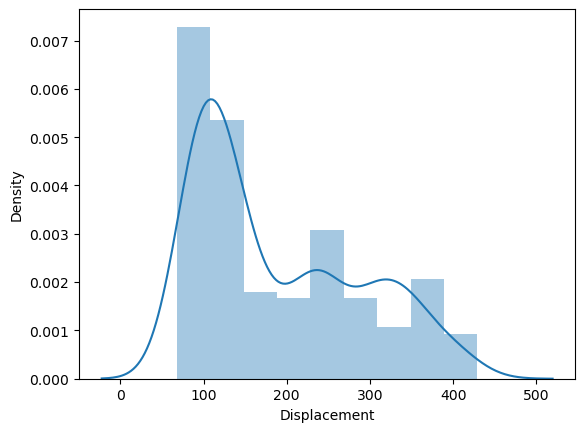

In [113]:
sns.distplot(df['Displacement'])

C:\Users\rashe\AppData\Local\Temp\ipykernel_13872\4028433040.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Horsepower'])


<Axes: xlabel='Horsepower', ylabel='Density'>

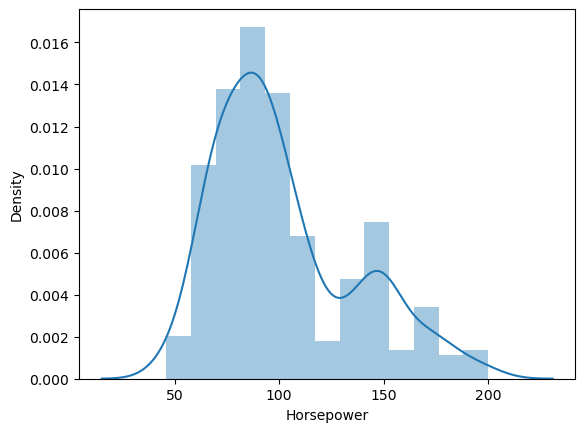

In [114]:
sns.distplot(df['Horsepower'])

C:\Users\rashe\AppData\Local\Temp\ipykernel_13872\863374677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Acceleration'])


<Axes: xlabel='Acceleration', ylabel='Density'>

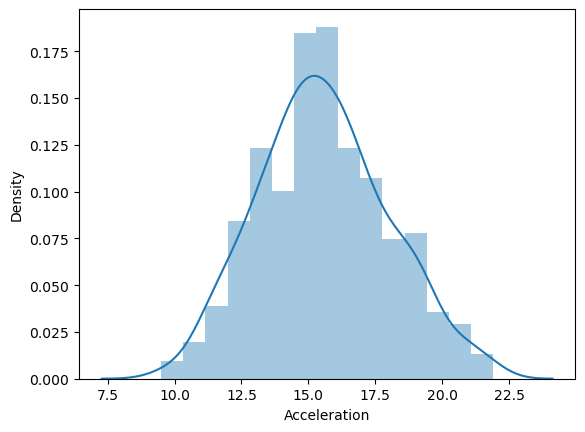

In [115]:
sns.distplot(df['Acceleration'])

<Axes: xlabel='Cylinders'>

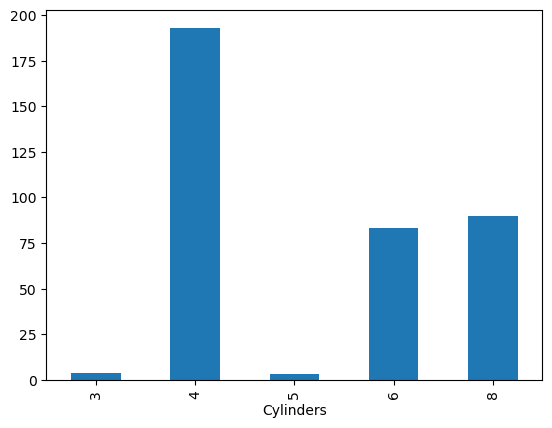

In [116]:
df.groupby('Cylinders')['Cylinders'].count().plot(kind='bar')

<Axes: xlabel='Model_year'>

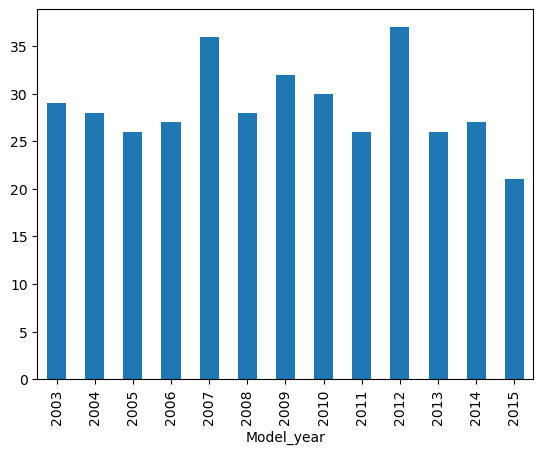

In [117]:
df.groupby('Model_year')['Model_year'].count().plot(kind='bar')

<Axes: xlabel='Car_Name'>

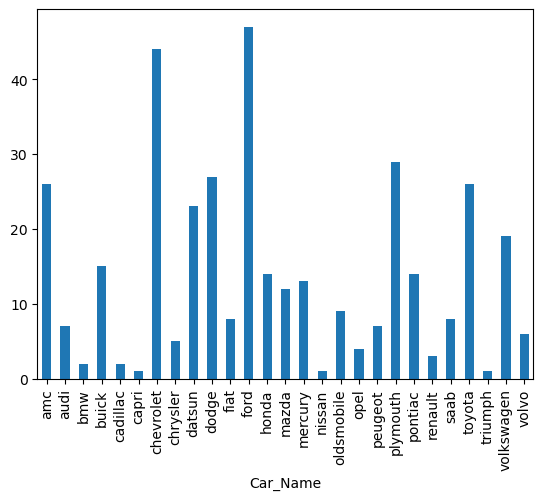

In [118]:

df.groupby('Car_Name')['Car_Name'].count().plot(kind='bar')

# pearson correlation

In [119]:
df_numeric=df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin
0,8.0,8,307.0,130.0,3504,12.0,2015,1
1,15.0,8,350.0,165.0,3693,11.5,2015,1
2,18.0,8,318.0,150.0,3436,11.0,2015,1
3,16.0,8,304.0,150.0,3433,12.0,2015,1
4,17.0,8,302.0,140.0,3449,10.5,2015,1


In [120]:
df_numeric=df_numeric.drop(['Cylinders','Model_year','Origin'],axis=1)
df_numeric.head()

,MPG,Displacement,Horsepower,Weight,Acceleration
0,8.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5


<Axes: >

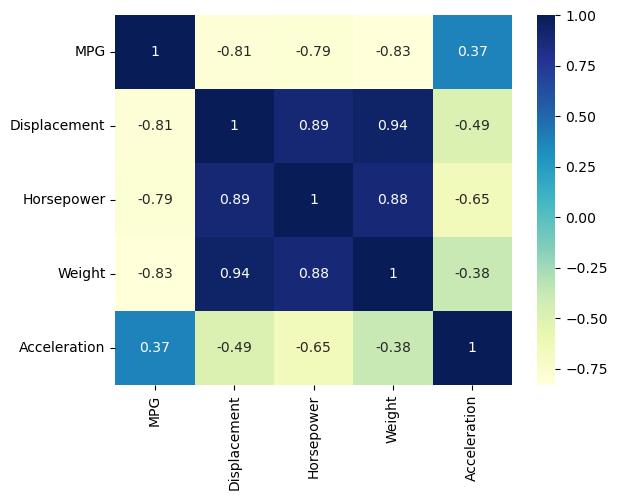

In [121]:
sns.heatmap(df_numeric.corr(),cmap='YlGnBu',annot=True)

In [122]:
#dummy conversion(one-hot encoding)
#changing catagorivcal value to numerical values
df=df.drop('Model_year',axis=1)

In [123]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Origin            int64
Car_Name         object
dtype: object

In [124]:
df['Cylinders']=df['Cylinders'].astype('object') #astype used for variable conversion
df['Origin']=df['Origin'].astype('object')
df.dtypes

MPG             float64
Cylinders        object
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Origin           object
Car_Name         object
dtype: object

In [125]:
#create a new df to store catagorical variable for dummy conversion
df_catagorical=df.select_dtypes(include='object')
df_catagorical.head()

,Cylinders,Origin,Car_Name
0,8,1,chevrolet
1,8,1,buick
2,8,1,plymouth
3,8,1,amc
4,8,1,ford


In [126]:
#dummy conversion
df_dummy=pd.get_dummies(df_catagorical,drop_first=True)
df_dummy.head()

,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_2,Origin_3,Car_Name_audi,Car_Name_bmw,Car_Name_buick,Car_Name_cadillac,...,Car_Name_opel,Car_Name_peugeot,Car_Name_plymouth,Car_Name_pontiac,Car_Name_renault,Car_Name_saab,Car_Name_toyota,Car_Name_triumph,Car_Name_volkswagen,Car_Name_volvo
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [141]:
#create x and y

x=df_final.drop('MPG',axis=1)
y=df_final['MPG']

# combine data from df numericand df dummy

df_final=pd.concat([df_numeric,df_dummy],axis=1)
df_final.head()

In [140]:
df_final=pd.concat([df_numeric,df_dummy],axis=1) 
df_final.head()

,MPG,Displacement,Horsepower,Weight,Acceleration,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_2,...,Car_Name_opel,Car_Name_peugeot,Car_Name_plymouth,Car_Name_pontiac,Car_Name_renault,Car_Name_saab,Car_Name_toyota,Car_Name_triumph,Car_Name_volkswagen,Car_Name_volvo
0,8.0,307.0,130.0,3504,12.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,350.0,165.0,3693,11.5,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,318.0,150.0,3436,11.0,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,16.0,304.0,150.0,3433,12.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,302.0,140.0,3449,10.5,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [142]:
#future selection import rfe

from sklearn.linear_model import LinearRegression

In [143]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=999)

In [144]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(261, 36) (112, 36) (261,) (112,)


In [145]:
#future selection

#first to sselect a key_feature object to select the
key_features=SelectKBest(score_func=f_regression,k=5)

#fit the key feature of training data and transform it

xtrain_selected=key_features.fit_transform(xtrain,ytrain)
selected_indices=key_features.get_support(indices=True)
selected_features=xtrain.columns[selected_indices]


In [146]:
selected_features

Index(['Displacement', 'Horsepower', 'Weight', 'Cylinders_4', 'Cylinders_8'], dtype='object')

# build linear regression

In [147]:
linreg=LinearRegression()
#fit the model using training sample
linreg.fit(xtrain_selected,ytrain)
linreg.score(xtrain_selected,ytrain)#print the accuracy of the training data

0.7315721978543801

In [152]:
#evaluvate the model on the test set using the selected feature.iloc
xtest_selected=xtest.iloc[:,selected_indices]
score=linreg.score(xtest_selected,ytest)
score

C:\Users\rashe\Documents\Python Scripts\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.7390967781550692

In [153]:
#predict mileage based on xtrxr'

predicted_mpg=linreg.predict(xtest_selected)


C:\Users\rashe\Documents\Python Scripts\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [159]:
predicted_mpg=linreg.predict(xtest_selected)

C:\Users\rashe\Documents\Python Scripts\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [160]:
print(predicted_mpg)

[33.12419779 27.57219208 18.61052982 13.34769069 19.05757244 17.43806527
 20.79235684 31.30569683 32.60903826 15.47180486 29.40491474 11.83291006
 21.13793283 33.58433582 17.9581058  19.00546573 17.14787918 30.76213645
 28.98529431 21.1409844  26.99675802 16.4430998  32.86377425 27.49649988
 15.14508899 27.19918895 30.89663773 26.02361995 16.27515146 17.71896251
 20.78742617 24.24973624 16.21671292 32.15266529 30.91113147 21.9167639
 21.76642663 20.90821518 20.68603219 21.00619127 18.24998066 30.76861561
 17.42395861 16.16965052 31.46625194 22.3940509  18.27920373 11.66528146
 31.50645751 29.10424056 20.58860788 30.74749294 14.67843403 23.75329472
 17.21405876 26.50861859 29.25187482 29.24948544 31.25788357 31.45293162
 31.54408889 32.93138933 23.32204472 13.86433567 19.246479   28.45841477
 20.85651968 29.36224476 15.96973883 17.19022999 31.36727983 18.11727199
 14.86077873 20.34555932 33.62933282 21.24413551 20.69006469 21.55232583
 21.27465953 11.93193973 13.35455269 21.95082612 31.

In [162]:
linreg.intercept_

42.00962464340135

In [163]:
linreg.coef_

array([ 0.00377013, -0.08844825, -0.0043344 ,  3.74463325,  3.2414716 ])